### *<span style="color:red"> The file I uploaded previously wasn't saved so please ignore the old ones. Sorry for the inconvenient caused. </span>.*

# Lab 6 - SVM

Import packages:

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Generate example data:

In [2]:
n_cls = 20   # Number of samples in each class.
 
np.random.seed(1)  # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
 
X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))
 
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))

Train a model of a linear SVC classifier (with regularisation coeficient C = 1000):

In [3]:
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

SVC(C=1000, kernel='linear', probability=True, random_state=1)

Visualise feature space, observations, support vectors and decision boundaries with margin:

<Figure size 640x480 with 0 Axes>

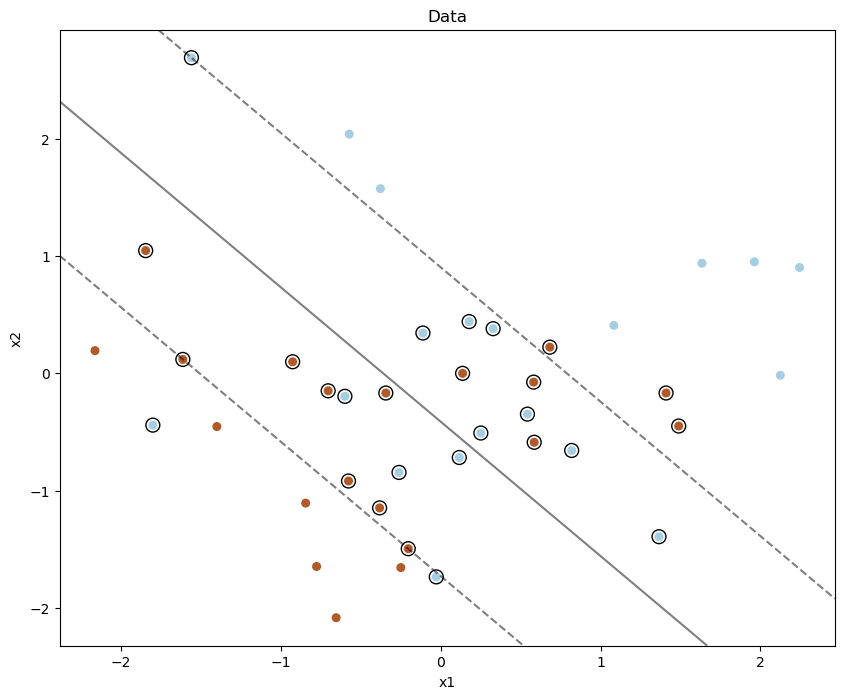

In [4]:
fig = plt.figure(1)

plt.figure(figsize=(10,8))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

Make classification of new samples:

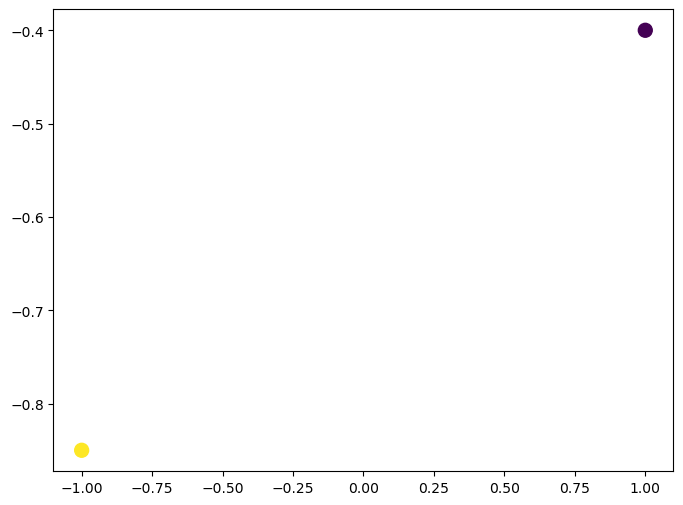

In [5]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])
 
y_new = clf.predict(X_new)
 
plt.figure(figsize=(8,6))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

Calculate probabilities a posteriori for new samples:

In [6]:
# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print(post_probs)

[[0.62901122 0.37098878]
 [0.26314804 0.73685196]]


## Email Spam



### get_vocabularly_dict.py

In [15]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import csv

from typing import Dict

def get_vocabulary_dict() -> Dict[str, int]:
    vocab_dict = {}
    with open('svm_spam__skeleton/data/vocab.txt', 'rb') as file:
        for line in file:
            idx, word = line.split()
            idx = idx.decode('UTF-8')
            word = word.decode('UTF-8')
            vocab_dict[idx] = word

    return vocab_dict


### process_email.py

In [8]:
import re
from typing import List
from nltk import PorterStemmer

def process_email(email_contents: str) -> List[int]:
    """Pre-process the body of an email and return a list of indices of the
    words contained in the email.

    :param email_contents: the body of an email
    :return: a list of indices of the words contained in the email
    """
    # FIXME: Load the vocabulary.
    vocabulary_dict = get_vocabulary_dict()

    # FIXME: Initialize the return value.
    word_indices = []

    # ========================== Preprocess Email ===========================

    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers

    # header_token = '\n\n'
    # header_start = email_contents.find(header_token)
    # email_contents = email_contents[header_start+len(header_token):]

    # FIXME: Convert email content to lower case.
    email_contents = email_contents.lower()

    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents = re.sub('<[^<>]+>', ' ', email_contents)

    # FIXME: Handle numbers.
    # Convert all sequences of digits (0-9) to a 'number' token.
    email_contents = re.sub('\S+[0-9]+', 'number', email_contents)

    # FIXME: Handle URLs.
    # Convert all strings starting with http:// or https:// to a 'httpaddr' token.
    email_contents = re.sub('^(http|https)://', 'httpaddr', email_contents)

    # FIXME: Handle email addresses.
    # Convert all strings with @ in the middle to a 'emailaddr' token.
    email_contents = re.sub('\S+@\S+', 'emailaddr', email_contents)

    # FIXME: Handle $ sign
    # Convert all sequences of $ signs to a 'dollar' token.
    email_contents = re.sub('[$]+', 'dollar', email_contents)

    # ========================== Tokenize Email ===========================

    # Output the email to screen as well
    # print('\n==== Processed Email ====\n\n')

    # Process file
    col = 0

    # Tokenize and also get rid of any punctuation
    tokens = re.split('[ @$/#.-:&*\+=\[\]?!\(\)\{\},''">_<;#\n\r]', email_contents)

    for token in tokens:

        # Remove any non alphanumeric characters
        token = re.sub('[^a-zA-Z0-9]', '', token)

        # Stem the word 
        token = PorterStemmer().stem(token.strip())

        # Skip the word if it is too short
        if len(token) < 1:
            continue

        # Look up the word in the dictionary and add to word_indices if
        # found
        # FIXME: ======================= YOUR CODE HERE ======================
        # Instructions: Fill in this function to add the index of str to
        #               word_indices if it is in the vocabulary. At this point
        #               of the code, you have a stemmed word from the email in
        #               the variable str. You should look up str in the
        #               vocabulary list (vocabulary_dict). If a match exists, you
        #               should add the index of the word to the word_indices
        #               vector. Concretely, if str = 'action', then you should
        #               look up the vocabulary list to find where in vocabulary_dict
        #               'action' appears. For example, if vocabulary_dict{18} =
        #               'action', then, you should add 18 to the word_indices 
        #               vector (e.g., word_indices = [word_indices ; 18]; ).
        # 
        # Note: vocabulary_dict{idx} returns a the word with index idx in the
        #       vocabulary list.
        # 
        # Note: You can use strcmp(str1, str2) to compare two strings (str1 and
        #       str2). It will return 1 only if the two strings are equivalent.
        #

        for i, word in enumerate(vocabulary_dict.values()):
            if token == word:
                word_indices.append(i + 1)

        # ========================= END OF YOUR CODE ==========================

        # Print to screen, ensuring that the output lines are not too long
        # if (col + len(token) + 1) > 78:
        #     print('')
        #     col = 0
        # print('{} '.format(token), end='', flush=True)
        # col = col + len(tokens) + 1

    # Print footer
    # print('\n\n=========================\n')

    return word_indices

### email_features.py

In [9]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
from typing import List

import numpy as np


def email_features(word_indices: List[int]) -> np.ndarray:
    """Convert a list of word IDs into a feature vector.

    :param word_indices: a list of word IDs
    :return: a feature vector from the word indices (a row vector)
    """

    # Total number of words in the dictionary
    n_words = 1899

    # FIXME: ====================== YOUR CODE HERE ============================
    # Instructions: Fill in this function to return a feature vector for the
    #               given email (word_indices). To help make it easier to 
    #               process the emails, we have have already pre-processed each
    #               email and converted each word in the email into an index in
    #               a fixed dictionary (of 1899 words). The variable
    #               word_indices contains the list of indices of the words
    #               which occur in one email.
    # 
    #               Concretely, if an email has the text:
    #
    #                  The quick brown fox jumped over the lazy dog.
    #
    #               Then, the word_indices vector for this text might look 
    #               like:
    #               
    #                   60  100   33   44   10     53  60  58   5
    #
    #               where, we have mapped each word onto a number, for example:
    #
    #                   the   -- 60
    #                   quick -- 100
    #                   ...
    #
    #              (note: the above numbers are just an example and are not the
    #               actual mappings).
    #
    #              Your task is take one such word_indices vector and construct
    #              a binary feature vector that indicates whether a particular
    #              word occurs in the email. That is, x(i) = 1 when word i
    #              is present in the email. Concretely, if the word 'the' (say,
    #              index 60) appears in the email, then x(60) = 1. The feature
    #              vector should look like:
    #
    #              x = [ 0 0 0 0 1 0 0 0 ... 0 0 0 0 1 ... 0 0 0 1 0 ..];
    #
    # =========================================================================

    feature_vector = np.zeros(n_words, dtype = int)

    for idx in word_indices:
        feature_vector[idx] = 1

    return feature_vector

    # =========================== END OF YOUR CODE ============================


### svm_spam.py

In [10]:
def read_file(file_path: str) -> str:
    contents = ""
    with open(file_path, 'rb') as file:
        for line in file:
            line = line.decode('UTF-8')
            contents += line
    return contents

In [16]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score

# %% ==================== Part 1: Email Preprocessing ====================
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in process_email.py to produce a word indices vector
#  for a given email.

print('\nPreprocessing sample email (emailSample1.txt)\n')

file_contents = read_file('svm_spam__skeleton/data/emailSample1.txt')
word_indices = process_email(file_contents)

# Print Stats
print('Word Indices: \n')
print(word_indices)

# input('Program paused. Press enter to continue.\n')

# %% ==================== Part 2: Feature Extraction ====================
#  Now, you will convert each email into a vector of features in R^n. 
#  You should complete the code in email_features.py to produce a feature
#  vector for a given email.

print('\nExtracting features from sample email (emailSample1.txt)\n')

# Extract Features
file_contents = read_file('svm_spam__skeleton/data/emailSample1.txt')
word_indices = process_email(file_contents)
features = email_features(word_indices)

# Print Stats
print('Length of feature vector: {}'.format(len(features)))
print('Number of non-zero entries: {}'.format(sum(features)))

# input('Program paused. Press enter to continue.\n')

# %% =========== Part 3: Train Linear SVM for Spam Classification ========
#  In this section, you will train a linear classifier to determine if an
#  email is Spam or Not-Spam.

# Load the Spam Email dataset
# You will have X, y in your environment

print('\nLoading the training dataset...')
X_train = np.genfromtxt('svm_spam__skeleton/data/spamTrain_X.csv', delimiter=',')
y_train = np.genfromtxt('svm_spam__skeleton/data/spamTrain_y.csv', delimiter=',')
print('The training dataset was loaded.')

print('\nTraining Linear SVM (Spam Classification)\n')
print('(this may take 1 to 2 minutes) ...\n')

# FIXME: Create a linear SVC classifier (with C = 0.1).
clf = svm.SVC(kernel='linear', C = 1.0)

# FIXME: Fit the SVC model using the training data.
clf.fit(X_train, y_train)

# FIXME: Predict the labelling.
y_pred = clf.predict(X_train)

# FIXME: Compute the training accuracy.
acc_train = accuracy_score(y_train, y_pred)
print('Training Accuracy: {:.2f}%\n'.format(acc_train * 100))

# %% =================== Part 4: Test Spam Classification ================
#  After training the classifier, we can evaluate it on a test set.

# FIXME: Load the test dataset ('data/spamTest_X.csv', 'data/spamTest_y.csv').
# You will have Xtest, ytest in your environment
X_test = np.genfromtxt('svm_spam__skeleton/data/spamTest_X.csv', delimiter=',')
y_test = np.genfromtxt('svm_spam__skeleton/data/spamTest_y.csv', delimiter=',')

print('\nEvaluating the trained Linear SVM on a test set ...\n')

# FIXME: Predict the labelling.
y_pred = clf.predict(X_test)

# FIXME: Compute the training accuracy.
acc_test = accuracy_score(y_test, y_pred)
print('Test Accuracy: {:.2f}%\n'.format(acc_test * 100))


Preprocessing sample email (emailSample1.txt)

Word Indices: 

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 1120, 1893, 1510, 798, 1882, 309, 1182, 1237, 1120, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]

Extracting features from sample email (emailSample1.txt)

Length of feature vector: 1899
Number of non-zero entries: 45

Loading the training dataset...
The training dataset was loaded.

Training Linear SVM (Spam Classification)

(this may take 1 to 2 minutes) ...

Training Accuracy: 99.98%


Evaluating the trained Linear SVM on a test set ...

Test Accuracy: 97.80%



In [18]:
# %% ================= Part 5: Top Predictors of Spam ====================
#  Since the model we are training is a linear SVM, we can inspect the
#  weights learned by the model to understand better how it is determining
#  whether an email is spam or not. The following code finds the words with
#  the highest weights in the classifier. Informally, the classifier
#  'thinks' that these words are the most likely indicators of spam.

# FIXME: Print the list of 15 most prominent features.
# (i.e. words which gives strongest evidence for an email being a spam)
# - Obtain the weights of the SVC model.
# - Obtain the indices that would sort the weights in the descending order.
# - Obtain the vocabulary.

weights = clf.coef_
idx = (- weights).argsort()

vocabulary_dict = get_vocabulary_dict();

print('\nTop predictors of spam: \n')

for i in range(15):
    # FIXME: Replace each `None` with an appropriate expression.
    print(' {word:<20}: {weight:10.6f}'.format(
        word=vocabulary_dict[str(idx[0][i])], weight=weights[0][i]))

print('\n\n')
# input('\nProgram paused. Press enter to continue.\n')



Top predictors of spam: 

 otherwis            :  -0.000144
 flag                :   0.020650
 why                 :   0.028653
 numberanumb         :   0.026964
 remot               :  -0.002054
 visa                :   0.041012
 clearli             :   0.245304
 board               :  -0.006389
 gt                  :   0.026633
 seminar             :   0.056874
 technolog           :   0.235090
 institut            :  -0.021551
 dollarac            :   0.069897
 titl                :  -0.029522
 base                :  -0.019205





In [21]:
# %% =================== Part 6: Try Your Own Emails =====================
#  Now that you've trained the spam classifier, you can use it on your own
#  emails! In the starter code, we have included spamSample1.txt,
#  spamSample2.txt, emailSample1.txt and emailSample2.txt as examples. 
#  The following code reads in one of these emails and then uses your 
#  learned SVM classifier to determine whether the email is Spam or 
#  Not Spam

# Set the file to be read in (change this to spamSample2.txt,
# emailSample1.txt or emailSample2.txt to see different predictions on
# different emails types). Try your own emails as well!
filenames = ['svm_spam__skeleton/data/spamSample1.txt',
            'svm_spam__skeleton/data/spamSample2.txt',
            'svm_spam__skeleton/data/emailSample1.txt',
            'svm_spam__skeleton/data/emailSample2.txt']

# Read and predict
for filename in filenames:
    file_contents = read_file(filename)
    word_indices = process_email(file_contents)
    x = email_features(word_indices)

    # FIXME: Predict the labelling.
    y_pred = clf.predict(x.reshape(1, -1))
    print('\nProcessed {}\n\nSpam Classification: {}\n'.format(filename, y_pred[0] > 0))

print('(1 indicates spam, 0 indicates not spam)\n\n')


Processed svm_spam__skeleton/data/spamSample1.txt

Spam Classification: True


Processed svm_spam__skeleton/data/spamSample2.txt

Spam Classification: True


Processed svm_spam__skeleton/data/emailSample1.txt

Spam Classification: False


Processed svm_spam__skeleton/data/emailSample2.txt

Spam Classification: False

(1 indicates spam, 0 indicates not spam)


